# PRAKTIKUM Natural Language Processing

----------
## **Thema: Linguistische Grundlagen und Text-Vorverarbeitung**

Im letzten Praktikum haben Sie sich in die Library ``spaCy`` eingearbeitet. In der Vorlesung wurden mittlerweile linguistische Grundlagen sowie Methoden zur Text-Normalisierung besprochen. Ziel dieses Praktikums ist nun die Wiederholung und Vertiefung von beidem, sowie das Sammeln erster Erfahrungen mit Komponenten aus der NLP-Library ``nltk``.

### Lernziele: 
* die Vorlesungsinhalte vertiefen und besser verstehen (Text-Normalisierungsmethoden, Types / Tokens)
* die zur Text-Normalisierung erforderlichen Libraries und Methoden kennen und anwenden können 
* Unterschiede bzw. Stärken und Schwächen verschiedener Methoden zum Stemming / zur Lemmatisierung einschätzen können
* Erste Erfahrungen mit der Bibliothek ``nltk`` sammeln
* Grenzen und Möglichkeiten einer (semantischen) Inhaltsanalyse ohne Berücksichtigung der Satzstruktur und des (näheren) Kontextes einschätzen lernen

### Lernkontrolle: 
* das theoretische Verständnis wird in der Klausur zur Vorlesung abgeprüft werden bzw. indirekt über die korrekte Verwendung der Verfahren in den folgenden Praktikumseinheiten
* die praktischen Fertigkeiten werden durch die zur Abgabe markierten Übungsaufgaben nachgewiesen

-----------
## **Lernmaterial**

1. Vorlesungsunterlagen
2. Die zur Verfügung gestellten Übungsaufgaben
3. Die Einarbeitung in die erforderlichen NLTK-Komponenten kann mit Hilfe der Dokumentation https://www.nltk.org/ oder des NLTK-Buches erfolgen http://www.nltk.org/book/ 


------------
### Übungsaufgaben 

#### **Vorbereitung**
Suchen Sie sich einen der im Ordner "data" zur Verfügung gestellten Texte aus und laden Sie ihn. 

Zur Verfügung stehen: 
1. tv-debate: Ein Datensatz im CSV-Format mit englischen Redebeiträgen während des ersten TV-Duells zur Präsidentschaftswahl in den USA im Jahr 2016. Benötigt wird hier nur die Spalte "transcript"
2. geography: Texte aus einem Geographie-Lehrbuch (englisch)
3. bibel: Ein Ausschnitt aus der deutschen Lutherbibel von 1912 (Passions- und Ostergeschichte aus Matthäus 26-28)

Das Ergebnis dieses Schrittes sollte ein einzelner String sein, der den gesamten Text enthält. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy

In [2]:
lines = []
with open('./data/bibel/Passions-und-Ostergeschichte-Matthaeus-Evangelium.txt') as f:
    lines += f.readlines()
    
# add others

In [3]:
data = pd.DataFrame(lines)
data

,0
0,\n
1,"Und es begab sich, da Jesus alle diese Reden ..."
2,"Ihr wisset, daß nach zwei Tagen Ostern wird; ..."
3,Da versammelten sich die Hohenpriester und Sc...
4,"und hielten Rat, wie sie Jesum mit List griff..."
...,...
152,"Da sie aber hingingen, siehe, da kamen etlich..."
153,Und sie kamen zusammen mit den Ältesten und h...
154,und sprachen: Saget: Seine Jünger kamen des N...
155,Und wo es würde auskommen bei dem Landpfleger...


In [4]:
data = data.drop(data.index[data[0] == '\n'])

In [5]:
data.head

<bound method NDFrame.head of                                                      0
1     Und es begab sich, da Jesus alle diese Reden ...
2     Ihr wisset, daß nach zwei Tagen Ostern wird; ...
3     Da versammelten sich die Hohenpriester und Sc...
4     und hielten Rat, wie sie Jesum mit List griff...
5     Sie sprachen aber: Ja nicht auf das Fest, auf...
..                                                 ...
152   Da sie aber hingingen, siehe, da kamen etlich...
153   Und sie kamen zusammen mit den Ältesten und h...
154   und sprachen: Saget: Seine Jünger kamen des N...
155   Und wo es würde auskommen bei dem Landpfleger...
156   Und sie nahmen das Geld und taten, wie sie ge...

[156 rows x 1 columns]>

In [6]:
pure_text = ''.join(data[0].values).replace("\n", "")

In [7]:
# split
# ...

#### **Aufgabe 1: Stemming und Lemmatisierung** 
**Teil 1: Theorie** <br>
Beschreiben Sie in einigen Sätzen, was mit "Stemming" und "Lemmatisierung" gemeint ist und wie sich beide voneinander unterscheiden. 

- Bei dem Stemming geht es darum den Stamm eines Wortes zu finden
- Bei der Lemmatierung wird versucht die Grundform (zeitlich) zu finden

**Teil 2: Praxis** <span style="color:red">(Abgabe, 3 Punkte)</span> <br>
Wenden Sie verschiedene Stemmer sowie einen Lemmatizer an und vergleichen Sie die Ergebnisse.
Ein Lemmatizer findet sich in ``spaCy``. Stemming ist dort nicht vorhanden. Verschiedene Stemmer (wie den Lancaster Stemmer oder den Snowball Stemmer) finden Sie allerdings in der Library ``nltk``. Nähere Informationen dazu finden sich beispielsweise in https://www.nltk.org/ und http://www.nltk.org/book/ (Kapitel 3.6). 

Vergleichen Sie das Ergebnis der unterschiedlichen Verfahren 50 Tokens Ihres Textes, indem Sie diese in folgendem Format ausgeben: <br>
*Original-Token --> Token nach Stemming mit Lancaster Stemmer --> Stemming mit Snowball-Stemmer --> lemmatisierte Version*  

Weitere Hinweise: 
* Bei einem deutschen Text kann der Lancaster-Stemmer nicht verwendet werden. 
* ggf. können auch weitere Stemmer ausprobiert und in den Vergleich einbezogen werden!

In [8]:
nlp = spacy.load("de_core_news_sm")

C:\Users\tobia\anaconda3\envs\ai\lib\site-packages\spacy\util.py:833: UserWarning: [W095] Model 'de_core_news_sm' (3.1.0) was trained with spaCy v3.1 and may not be 100% compatible with the current version (3.2.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [9]:
doc = nlp(' '.join(lines).replace("\n", ""))

In [10]:
doc.text

'  Und es begab sich, da Jesus alle diese Reden vollendet hatte, sprach er zu seinen Jüngern:  Ihr wisset, daß nach zwei Tagen Ostern wird; und des Menschen Sohn wird überantwortet werden, daß er gekreuzigt werde.   Da versammelten sich die Hohenpriester und Schriftgelehrten und die Ältesten im Volk in den Palast des Hohenpriesters, der da hieß Kaiphas,  und hielten Rat, wie sie Jesum mit List griffen und töteten.  Sie sprachen aber: Ja nicht auf das Fest, auf daß nicht ein Aufruhr werde im Volk!  Da nun Jesus war zu Bethanien im Hause Simons, des Aussätzigen, -   trat zu ihm ein Weib, das hatte ein Glas mit köstlichem Wasser und goß es auf sein Haupt, da er zu Tische saß.  Da das seine Jünger sahen, wurden sie unwillig und sprachen: Wozu dient diese Vergeudung?  Dieses Wasser hätte mögen teuer verkauft und den Armen gegeben werden.  Da das Jesus merkte, sprach er zu ihnen: Was bekümmert ihr das Weib? Sie hat ein gutes Werk an mir getan.  Ihr habt allezeit Arme bei euch; mich aber habt

In [11]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer

stemmer = SnowballStemmer("german")
stemmer2 = LancasterStemmer()

addition1 = len("Snowball Stemmer:") - len("Lemmatisiert:")
addition2 = len("Lancaster Stemmer") - len("Lemmatisiert:")
print("Originale:", "    Lemmatisiert:", "    Snowball Stemmer:", "    Lancaster Stemmer")
for token in doc[1:30]:
    print(token.text, " "*(16-len(token.text)), token.lemma_," "*(16+addition1-len(token.text)), stemmer.stem(token.text), " "*(16+addition2-len(token.text)), stemmer2.stem(token.text))

Originale:     Lemmatisiert:     Snowball Stemmer:     Lancaster Stemmer
Und               und                   und                   und
es                ich                    es                    es
begab             begeben                 begab                 begab
sich              sich                  sich                  sich
,                 ,                     ,                     ,
da                da                    da                    da
Jesus             Jesus                 jesus                 jes
alle              all                  all                  al
diese             dies                 dies                 dies
Reden             Rede                 red                 red
vollendet         vollenden             vollendet             vollendet
hatte             haben                 hatt                 hat
,                 ,                     ,                     ,
sprach            sprechen                sprach                sprach


**Teil 3: Auswertung** <br>
Vergleichen und diskutieren Sie die Ergebnisse aus Teil 2. Überlegen Sie auch: Unter welchen Umständen würden Sie eher einen Stemmer verwenden? Wann einen Lemmatizer?  

---
Bei der Lemmartisierung werden die Wörter meist umgeformt.

Anders die 2 Stemming Arten. Diese formen meist nicht um, sondern entfernen etwas vom Wort.

#### Wann welches:
Wenn einem die Basis des Wortes also noch das Wort an sich wichtig ist (wird -> wird nicht werden), beislisweise beim zählen von wörtern, bietet sich das Stemming mehr an.
Falls man jedoch mit den Grundwörtern arbeiten möchte bietet sich das Lemmartieren mehr an. 
Beispiel: Man möchte alle Wörter "wissen" erhalten und der Text entählt es als wissen und als wisset, hier wäre die Lemmatisierung zu empfehlen, da dies damit besser funktioniert.
---

#### **Aufgabe 2: Weitere Verfahren der Text-Vorverarbeitung** 

**Teil 1: Theorie** <br>
1. Erklären Sie in eigenen Worten, was der Begriff "Daten-Bereinigung" (data cleaning) im Kontext von Textdaten meint. 
2. Nennen Sie Beispiele für Verfahren, die der Text-Bereinigung dienen. 
2. Erklären Sie in eigenen Worten, was der Begriff "Stopword-Removal" meint und wie definiert wird, was ein Stoppwort ist. 
3. Nennen Sie mindestens zwei NLP-Anwendungen, bei denen ein Stopword-Removal erforderlich ist und zwei Anwendungen, bei denen dies nicht sinvoll ist. 

1. Bei der Textanalyse müssen die Daten in die richtige Form gebracht werden, um sie sinnvoll in die Verarbeitungs-Pipeline geben zu können. Wichtig ist, dass die Wörter richtig kodiert werden, damit Umlaute und co nicht kryptisch dastehen.
Anschließend müssen die Daten für das weiterverarbeiten in der Pipeline weiter erweitert werden, mit der Tokenizierung.
Ab hier hängt es mit der Problemstellung ab, ob nun Lemmatisiert, Stemming betrieben wird. Auch das Entfernen von Zahlen, URLs, Links oder Stoppwörtern können Bereinigungsschritte sein.
Besser: Tippfehler, Format fehler

2. Allgmein Python und dessen built-ins können hierfür verwendet wern, sowie Pandas (falls die Daten in einem DataFrame liegen) und NLP-Libraries, wie spaCy oder nltk.

3. Hierbei werden die Stoppwörter entfernt und dies kann beispilsweise mit spaCy und Pandas getan werden. Oft möchte man nur bestimmte Stoppwörter entfernen. 
Hier ein Beispiel:

``` python:
import spacy

nlp = spacy.load(...)
all_stopwords = nlp.Defaults.stop_words
all_stopwords.remove('aber')

text = "Irgendein Text..."
doc = nlp(text)
tokens_without_sw = [word for word in doc if not word in all_stopwords]
```

4. Bei einer Analyse vo Verben, hier kann man beim Entfernen von Stoppwörtern die Anzahl an Daten verringern.
Jedoch bei einer Analyse der Satzstellung, beispielsweise bei einer Korrekturhilfein einem Schreibprogramm, sind die Stoppwörter sehr wichtig, da diese gebraucht werden (beispielsweise beim Dependency Parsing).

**Teil 2: Praxis** <span style="color:red">(Abgabe, 2 Punkte)</span> <br>
Berechnen Sie den Anteil an Stoppwörter, in dem von Ihnen gewählten Text. 

In [12]:
stop_words = []
counter = 0

for token in doc:
    counter += 1
    if token.is_stop:
        stop_words += [token.text]
        
print("Anteil der Stoppwörtern", round(((len(stop_words)/counter)*100), 2), "%")

Anteil der Stoppwörtern 51.55 %


**Teil 3: Praxis** <span style="color:red">(Abgabe, 2 Punkte)</span> <br>
Berechnen Sie die durchschnittliche Länge aller Stoppwörter im Text, sowie die durchschnittliche Länge aller anderen Wörter im Text. Satzzeichen, Ziffern etc. sollen bei der Zählung nicht berücksichtigt werden, sondern nur Tokens, die rein aus alphabetischen Zeichen bestehen!

In [13]:
counter_stop = 0
sum_stop = 0

counter_others = 0
sum_others = 0

for token in doc:
    
    if token.is_stop:
        counter_stop += 1
        sum_stop += len(token.text)
    else:
        counter_others += 1
        sum_others += len(token.text)
        
mean_len_stop = sum_stop / counter_stop
mean_len_others = sum_others / counter_others
        

print("Mean len of Stopwords   = ", round(mean_len_stop, 2))
print("Mean len of other Words = ", round(mean_len_others, 2))

Mean len of Stopwords   =  3.36
Mean len of other Words =  4.53


#### **Aufgabe 3: Textanalyse mit Hilfe von Wortwolken** 

In dieser Aufgabe werden Sie eine inhaltliche Textanalyse mit Hilfe von Wortwolken durchführen und zwar einmal ohne und einmal mit Textvorverarbeitung. Dabei sehen Sie den Text so, wie ein ML-Modell ihn "sehen" würde, das auf einem Bag-of-Words-Ansatz beruht. 


**Teil1: Erzeugen einer Wortwolke (ohne Vorverarbeitung des Textes)** <span style="color:red">(Abgabe, 2 Punkte) </span> <br>
Erzeugen Sie eine Wortwolke von Ihrem Text. Verwenden Sie dafür die Library ``wordcloud``. Nähere Informationen dazu finden Sie hier: https://amueller.github.io/word_cloud/.

Um die volle Kontrolle darüber zu haben, was als Wort betrachtet wird, verwenden Sie bitte die Methode ``generateFromFrequencies()``. Diese erwartet als Eingabe ein Dictionary mit Einträgen im Format "Wort":Häufigkeit. 

Beispiel für die Erzeugung einer einfachen WordCloud (gegeben ein entsprechendes Dictionary mit den Worthäufigkeiten): 
```
from wordcloud import WordCloud
wordcloud = WordCloud(width = 2000, height = 2000, background_color = "white").generate_from_frequencies(word_count_dictionary)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation = "bilinear")
```
Verwenden Sie zunächst den Original-Text (d.h. ohne Vorverarbeitungsschritte darauf durchzuführen)

In [54]:
def txt_to_dict(txt:str, count_limit=0, *remove_funcs):
    """
    Function for making a Dictionary with word:counts.
    
    And the function contains a limit of count to get in the final dictionary.
    
    In addition you can add multiple function to remove some words. Add it to the function call, it takes the doc elem
    and should return a list of words (keys) which will be removed of the dict.
    
    Sample call:txt_to_dict(lines, 0, remove_stopwords, remove_words
                                         -> 2 functions
    """
    
    nlp = spacy.load("de_core_news_sm")    
    
    doc = nlp(' '.join(txt).replace("\n", ""))
    
    txt_dict = dict()

    for token in doc:

        if token in txt_dict.keys():
            txt_dict[token.text] += 1
        else:
            txt_dict[token.text] = 1

    # collect the count words
    txt_dict = dict()

    for token in doc:

        if token in txt_dict.keys():
            txt_dict[token.text] += 1
        else:
            txt_dict[token.text] = 1
    
    # reject
    final_txt_dict = dict()
    for key, value in txt_dict.items():
        if value >= count_limit:
            final_txt_dict[key] = value
            
    # addition function
    for func in remove_funcs:
        to_remove = func(doc)
        for r in to_remove:
            if r in final_txt_dict.keys():
                del final_txt_dict[r]
        
        
    return final_txt_dict

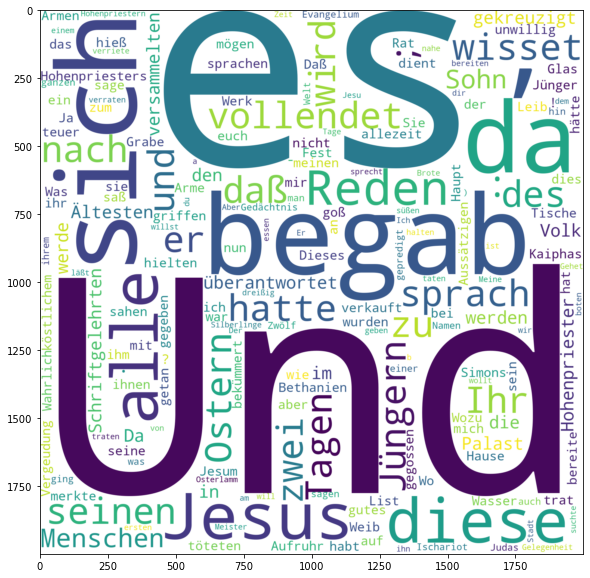

In [49]:
from wordcloud import WordCloud

# wordcloud = WordCloud(width = 2000, height = 2000, background_color = "white").generate(pure_text)
wordcloud = WordCloud(width = 2000, height = 2000, background_color = "white").generate_from_frequencies(txt_to_dict(lines, 0))

plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation = "bilinear")

**Teil 2: Diskussion und Verbesserungsvorschläge** <span style="color:red">(Abgabe, 3 Punkte) </span><br>
Gehen Sie davon aus, die Wortwolke diene dazu, einen Eindruck davon zu bekommen, worum es in dem Text geht. Vermutlich ist dies bisher noch nicht wirklich gut möglich. Welche Vorverarbeitungsschritte könnten helfen? 


---
**Antwort:**

Präpositionen, Konnektoren, Partikel und Interjektionen kommen in einem Text am Häufigsten vor. Diese tragen meist aber keinerlei Aussagen über die Eigenheit und inhaltliche Aussage im Text.

Deswegen sollten diese nicht betrachtet werden. Besser sollte man die Nomen und Verben betrachten (und eventuell Adjektive).

---


**Teil 3: Erzeugen einer Wortwolke (mit Vorverarbeitung)** <span style="color:red">(Abgabe, 2 Punkte) </span> <br>
Führen Sie möglichst viele der in Teil 2 spezifizierten Vorverarbeitungsschritte durch und erzeugen Sie die Wortwolke erneut. 

In [55]:
def remove_stopwords(doc) -> list:

    # remove stopwords
    to_remove = []

    for token in doc:
        if token.is_stop:
            to_remove += [token.text] 
            
    return to_remove

In [62]:
def remove_words(doc):
    return [',', "'s", ':', '!', '?', '.', ';', ')', '>>']

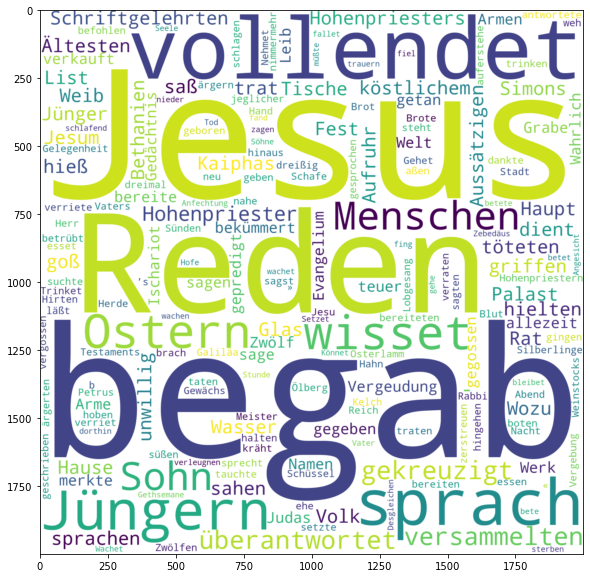

In [63]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 2000, height = 2000, background_color = "white").generate_from_frequencies(txt_to_dict(lines, 0, 
                                                                                                    remove_stopwords, remove_words))

plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation = "bilinear")

(Old)
<img src='./output.png'></img>

**Teil 4: Diskussion und Bewertung** <span style="color:red">(Abgabe, 3 Punkte) </span><br>
Inwiefern haben die Vorverarbeitungsschritte die Situation verbessert? Welche Aussagen zum Inhalt können Sie machen? Kurz: Wie weit kommen Sie bei dieser inhaltlichen Textanalyse ohne den Text selbst zu lesen? (Bedenken Sie dabei auch, dass Sie evtl. Vorkenntnisse bzw. hilfreiches Weltwissen haben!) Wenn Sie möchten können Sie den Text auch noch etwas überfliegen: Welche zusätzlichen Aussagen sind jetzt möglich? Was mussten Sie vielleicht korrigieren? 

**Bewertung:**
Die Wörter sind nun eindeutig näher daran und es nur sehr wenige Wörter, die nicht so viel mit dem Inhalt zu tun haben.
Daher war diese Vorverarbeitung ein richtiger Erfolg! 
Eine der Aussnahmen macht ein einzelnes S, welches eventuell nach einem Abostroph kam, welches alles eigentlich ein Wort sein sollte.
Nach dem Beispiel: So war's geschrieben.

**Was ich daraus lesen kann:**
Scheinbar wird in diesem Bibelabschnitt viel verbal übermittelt, was das häufige vorkommen von sprachen, sprach sagst, sprach Jesus, Jesus sprach beweisen.

Und scheinbar ist es Jesus der die Meiste Zeit sprach. Außerdem wurde jemand verraten und getötet/bzw. gekreuzigt, was man direkt mit Jesues assoziiert, da dieser sehr oft vorkommt und scheinbar eine starke Meinung hatte, beziehungsweise diese sehr oft und lautstark kundtut und wie man weis, war die öffentliche Meinungskuntat zur damaligen Zeit nicht so gern gesehen, was das verraten vom vielgesprächigen Jesus verstärkt.

Irgendetwas muss das auch mit Gott zu tun haben, da sein Name indirekt und direkt oft vorkommt (Gottessohn, Vater, Herr). Wer der Sohn Gotte ist ist nicht ganz klar, aber da Jesus so oft vorkommt, könnte der Leser diesen damit verbinden.

Die restlichen Wörter sind nicht mehr eindeutig einzuordnen und es ist zu erwarten, dass ab dieser Stelle jeder Mensch etwas unterschiedlich interpretiert.


#### **Aufgabe 4: Types und Tokens**

**Teil 1: Theorie**
1. Erklären Sie in einen Worten den Unterschied zwischen "Word Type" und "Word Token".
2. Wieviele Types und wieviele Tokens sind in folgendem Satz enthalten? *In Ulm und um Ulm und um Ulm herum.*

1. Word Token sind Wörtern und Satzzeichen. Word Type sind wie Word Tokens, aber nur einzigarteige Wörter (ein Wort nur einmal).



2.

Tokens = 10 Satzzeichen + Wörter -> In Ulm und um Ulm und um Ulm herum .

Types = 6 -> In Ulm und um herum .

---